In [1]:
#Importing all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset

data = pd.read_csv('netflix_titles.csv')

In [3]:
#Checking the loaded dataset to makesure that it has been loaded properly

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#Checking the shape of the dataset

data.shape

(8807, 12)

In [5]:
#Checking the size of the dataset

data.size

105684

In [6]:
#Checking the name of all the cloumns in the dataset

data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
#Checking the datatype of each and every column in the dataset using dtypes

data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
#Checking the overall information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Question 1 :

### Display all the columns with null values as a list

In [9]:
# Checking the dataset for null values and storing it in a vector 'null'
null = data.isna()
#Then checking for null columns and storing it in a vector 'null_columns'
null_columns = null.any()
#Then checking the columns in the dataset and putting them into a list and storing it in a vector 'columns_with_null'
columns_with_null = data.columns[null_columns].tolist()
columns_with_null

['director', 'cast', 'country', 'date_added', 'rating', 'duration']

### The column names are inconsistent. Changing the column names using rename(

In [11]:
#Checking the name of the columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
#renaming the column names with rename()

data = data.rename(columns = {'show_id':'Show_ID', 'type':'Category', 'title':'Title', 'director':'Director', 'cast':'Cast', 'country':'Country', 'date_added':'Date_Added', 'release_year':'Release_Year', 'rating':'Rating', 'duration':'Duration', 'listed_in':'Listed_in', 'description':'Description'})

In [14]:
data.head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
#Checking for any duplicated rows
data[data.duplicated()]

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description


In [16]:
data.duplicated().sum()

0

## Splitting the dataset into Movies data and TV Shows data and storing them in separate vectors

In [17]:
# Splitting the dataset and getting only movie details and storing it in a separate vector

movie_data = data[data['Category']=='Movie']
movie_data.head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [18]:
# Splitting the dataset and getting only TV Show details and storing it in a separate vector

TV_Shows_data = data[data['Category']=='TV Show']
TV_Shows_data.head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


# Q1: For 'House of Cards' what is the show id and who is the director of this show?

In [17]:
TV_Shows_data[TV_Shows_data['Title'] == "House of Cards"]

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [18]:
TV_Shows_data.query('Title == "House of Cards"')

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [19]:
data.query('Title == "House of Cards"')

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [20]:
data.query('Title == "House of Cards"').Show_ID

1059    s1060
Name: Show_ID, dtype: object

# Q2: In which year highest number of TV shows and movies were released? Bar graph

In [21]:
data.head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
data.describe()

,Release_Year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [23]:
Year = data['Release_Year'].value_counts()
Year

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: Release_Year, Length: 74, dtype: int64

<AxesSubplot:ylabel='Release_Year'>

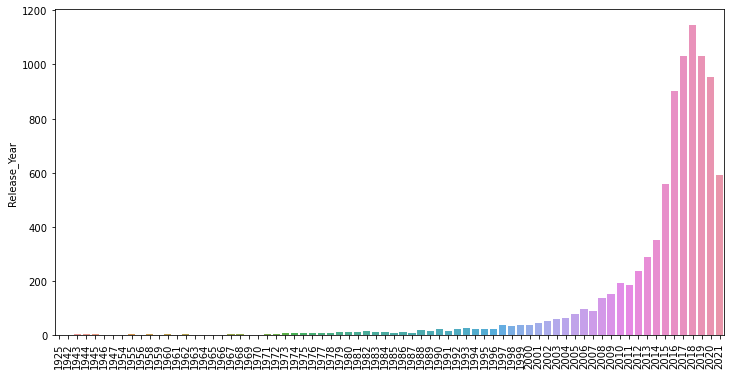

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x=Year.index, y=Year)


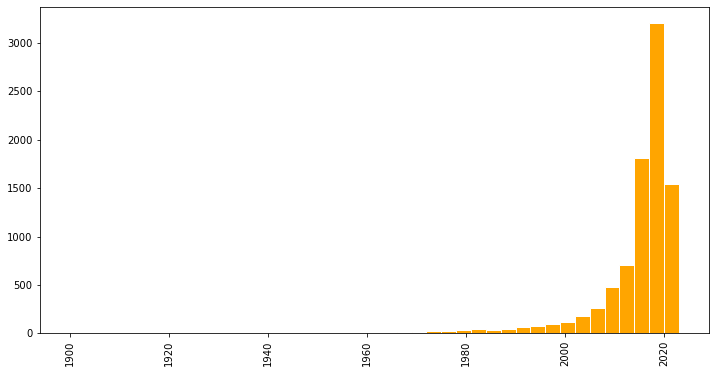

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.hist(data.Release_Year, bins = np.arange(1900,2025,3), color='orange',edgecolor = 'white')
plt.show()

<AxesSubplot:>

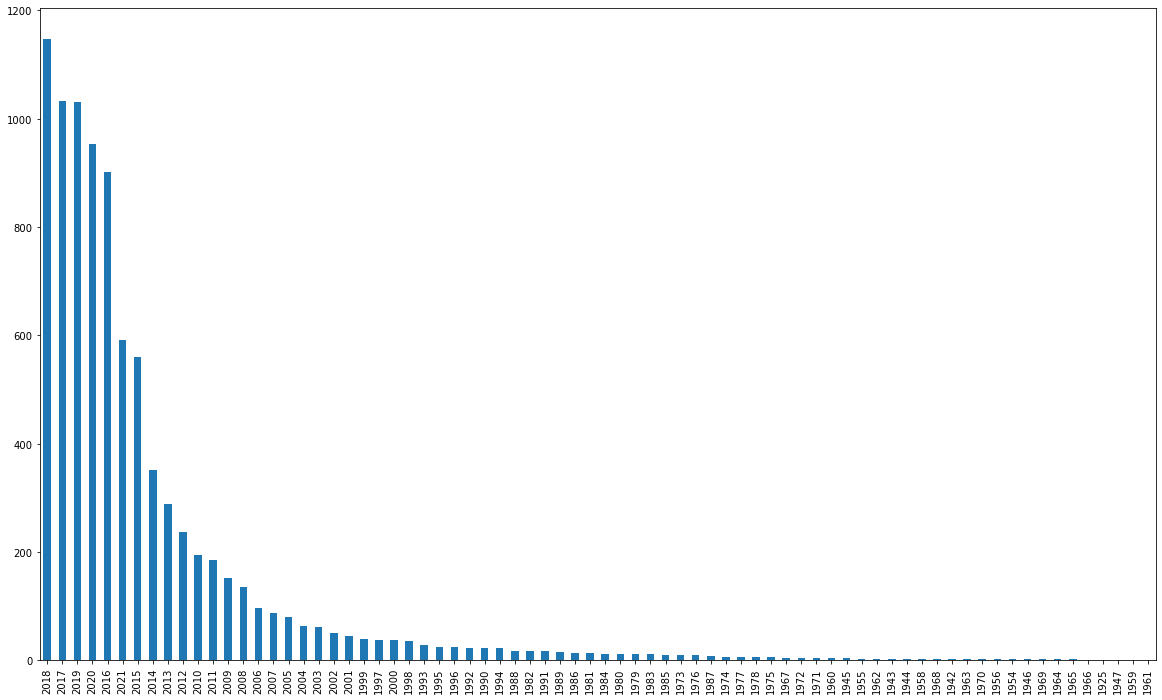

In [26]:
plt.figure(figsize = (20,12))
data['Release_Year'].value_counts().plot(kind='bar')


# Q3: How many movies and TV shows are in the dataset? Bar chart

In [27]:
movie_data.head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [28]:
movie_data.shape

(6131, 12)

In [29]:
movie_data.Show_ID.count()

6131

In [30]:
TV_Shows_data.Show_ID.count()

2676

## 2nd method

In [31]:
data.groupby('Category').Category.count()

Category
Movie      6131
TV Show    2676
Name: Category, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


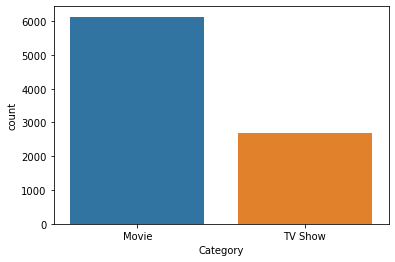

In [32]:
sns.countplot(data['Category'])
plt.show()

# Q4: Show all movies that released in year 2000

In [33]:
movie_data.head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [34]:
movie_data.Release_Year = movie_data.Release_Year.astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [35]:
movies_released_2000 = movie_data.query('Release_Year == "2000"').Title.tolist()
movies_released_2000

['The Nutty Professor II: The Klumps',
 'Space Cowboys',
 'The Original Kings of Comedy',
 "Charlie's Angels",
 'Snow Day',
 'Battlefield Earth',
 'The Whole Nine Yards',
 'Rugrats in Paris: The Movie',
 'Monty Python: Before the Flying Circus',
 'Fiza',
 'Phir Bhi Dil Hai Hindustani',
 'Joseph: King of Dreams',
 '28 Days',
 'American Psycho',
 'An American Tail: The Treasures of Manhattan Island',
 'Billy Elliot',
 'Center Stage',
 'Chal Mere Bhai',
 'Crouching Tiger, Hidden Dragon',
 'Dragonheart: A New Beginning',
 'Final Destination',
 'Hamara Dil Aapke Paas Hai',
 'How the Grinch Stole Christmas',
 'Kya Kehna',
 'Little Nicky',
 'Papa the Great',
 'Pukar',
 'Scary Movie',
 'Scream 3',
 'The Art of War',
 'The Flintstones in Viva Rock Vegas',
 'What Lies Beneath',
 'Where the Money Is']

## Movies in 1980

In [36]:
movies_released_1980 = movie_data.query('Release_Year == "1980"').Title.tolist()
movies_released_1980

['The Blue Lagoon',
 'The Long Riders',
 'Whispers',
 'Friendship',
 'Alibaba Aur 40 Chor',
 'Khubsoorat',
 'Playing for Time',
 'Popeye',
 'Raging Bull',
 'Return To The 36th Chamber',
 'Sword Masters: Two Champions of Shaolin']

# Q5: Show only titles of TV shows that were released in India only

In [37]:
TV_Shows_data.head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [38]:
TV_Shows_released_India = TV_Shows_data.query('Country == "India"').Title.tolist()
TV_Shows_released_India

['Kota Factory',
 'Chhota Bheem',
 'Dharmakshetra',
 'Raja Rasoi Aur Anya Kahaniyan',
 'Stories by Rabindranath Tagore',
 'The Creative Indians',
 'Navarasa',
 'Alma Matters',
 'Sab Jholmaal Hai',
 'Lava Ka Dhaava',
 'The Big Day',
 'Bombay Begums',
 'Zindagi in Short',
 'Pitta Kathalu',
 'Mighty Little Bheem: Kite Festival',
 'Regiment Diaries',
 'Paava Kadhaigal',
 'Bhaag Beanie Bhaag',
 'Fabulous Lives of Bollywood Wives',
 'Mismatched',
 'Bad Boy Billionaires: India',
 'Masaba Masaba',
 'Little Singham',
 'Betaal',
 'ChuChu TV Nursery Rhymes & Kids Songs (Hindi)',
 'Hasmukh',
 'Akbar\xa0Birbal',
 'Ladies Up',
 'She',
 'Mighty Little Bheem: Festival of Colors',
 'Taj Mahal 1989',
 'Jamtara - Sabka Number Ayega',
 'Little Things',
 'Mighty Little Bheem: Diwali',
 'College Romance',
 'Engineering Girls',
 'Girls Hostel',
 'Inmates',
 'Bard of Blood',
 'Typewriter',
 'Leila',
 'Delhi Crime',
 'Cricket Fever: Mumbai Indians',
 'Selection Day',
 'GHOUL',
 '21 Sarfarosh: Saragarhi 1897',


# Q6: Show top 10 Directors, who gave the highest number of TV Shows and Movies to Netflix 

In [39]:
top_10_directors = data['Director'].value_counts()
top_10_directors.head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Name: Director, dtype: int64

# Q7: Show all records where Category is movie and Type is comedies or country is United Kingdom

In [40]:
data.head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [41]:
data.Listed_in.unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [42]:
rec = data[(data['Category']=='Movie') & (data['Listed_in']=='Comedies')|(data['Country']=="United Kingdom")]
rec.head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ..."
72,s73,TV Show,Jack Whitehall: Travels with My Father,NaN,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...


In [43]:
data[(data['Category']=='Movie') & (data['Listed_in']=='Comedies')|(data['Country']=="United Kingdom")]

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ..."
72,s73,TV Show,Jack Whitehall: Travels with My Father,NaN,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...
...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,NaN,Dougray Scott,United Kingdom,"March 31, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...
8741,s8742,TV Show,Wild Arabia,NaN,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...
8744,s8745,Movie,Williams,Morgan Matthews,NaN,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...
8758,s8759,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."


# Q8: In how many Movies/Shows, Tom Cruise was cast?


In [44]:
data.head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [45]:
data[data['Cast'] =="Tom Cruise"]

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description


### This works only when the column has only "Tom Cruise". But there's no column which has only Tom Cruise.

#### So we have to use str.contains(

In [46]:
data[data['Cast'].str.contains("Tom Cruise")]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

## We get this error coz the cast columnhas a few null rows. This function cannot run on null rows. So we have to remove them.

In [48]:
data_new = data.dropna()

In [49]:
data_new.head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [50]:
data_new[data_new['Cast'].str.contains("Tom Cruise")]

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio..."
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki..."


# Q9: What are the different ratings defined by Netflix?

In [51]:
data.head(2)

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [52]:
data.Rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

### Q9.1: How many movies got 'TV-14' rating in Canada

In [53]:
Movies_TV14_Canada = movie_data[(movie_data.Rating == "TV-14" ) & (movie_data.Country=='Canada')]
Movies_TV14_Canada

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
157,s158,Movie,Level 16,Danishka Esterhazy,"Katie Douglas, Celina Martin, Peter Outerbridg...",Canada,"September 1, 2021",2018,TV-14,102 min,"Sci-Fi & Fantasy, Thrillers",In a bleak academy that teaches girls the virt...
1279,s1280,Movie,Made You Look: A True Story About Fake Art,Barry Avrich,NaN,Canada,"February 23, 2021",2020,TV-14,90 min,"Documentaries, International Movies",A woman walks into a New York gallery with a c...
2769,s2770,Movie,There's Something in the Water,"Ellen Page, Ian Daniel",Ellen Page,Canada,"March 27, 2020",2019,TV-14,72 min,"Documentaries, International Movies",This documentary spotlights the struggle of mi...
3424,s3425,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",2019,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...
5972,s5973,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
5973,s5974,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",2018,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
6192,s6193,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,"December 27, 2018",2018,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...
6537,s6538,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,"July 1, 2018",2018,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...
7334,s7335,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,"November 12, 2017",2017,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...
7916,s7917,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,"August 22, 2017",2016,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...


In [55]:
Movies_TV14_Canada.Show_ID.count()

13

## 2nd type

In [54]:
movie_data[(movie_data.Rating == "TV-14" ) & (movie_data.Country=='Canada')].shape

(13, 12)

### Q9.2: How many movies got 'R' rating after 2018

In [56]:
movie_data[(movie_data.Rating == "R" ) & (movie_data.Release_Year>'2018')].shape

(108, 12)

### Q9.3: How many TV shows got 'R' rating after 2018

In [57]:
TV_Shows_data.Release_Year = TV_Shows_data.Release_Year.astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [58]:
TV_Shows_data[(TV_Shows_data.Rating == "R" ) & (TV_Shows_data.Release_Year>'2018')]

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description


In [59]:
data[(data['Category']=="TV Show") & (data['Rating']=="R") & (data['Release_Year']>2018)]

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description


### Q9.4: How many TV shows got 'TV-14' rating after 2018

In [60]:
TV_Shows_data[(TV_Shows_data.Release_Year>'2018') & (TV_Shows_data.Rating == "TV-14")].shape

(253, 12)

# Q10: Whats the max duration of a movie/TV Show on Netflix?

In [61]:
data.head(2)

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [62]:
data.Duration.dtypes

dtype('O')

In [63]:
data.Duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [64]:
data[['Minutes', 'Unit']] = data.Duration.str.split(' ',expand=True)

In [65]:
data.head(2)

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description,Minutes,Unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons


In [66]:
data.dtypes

Show_ID         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Date_Added      object
Release_Year     int64
Rating          object
Duration        object
Listed_in       object
Description     object
Minutes         object
Unit            object
dtype: object

In [67]:
data.Minutes.unique()

array(['90', '2', '1', '91', '125', '9', '104', '127', '4', '67', '94',
       '5', '161', '61', '166', '147', '103', '97', '106', '111', '3',
       '110', '105', '96', '124', '116', '98', '23', '115', '122', '99',
       '88', '100', '6', '102', '93', '95', '85', '83', '113', '13',
       '182', '48', '145', '87', '92', '80', '117', '128', '119', '143',
       '114', '118', '108', '63', '121', '142', '154', '120', '82', '109',
       '101', '86', '229', '76', '89', '156', '112', '107', '129', '135',
       '136', '165', '150', '133', '70', '84', '140', '78', '7', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10', '123', '65', '68', '66', '62', '74', '131', '39', '46', '38',
       '8', '17', '126', '155', '159', '137', '12', '273', '36', '34',
       '77', '60', '49', '58', '72', '204', '212', '25', '73', '29', '47',
       '32', '35', '71', '149', '33', '15', '54', '224', '162', '37',
       '75', '79', '55', '158', '164', '173', '181', '185

In [69]:
data.shape

(8804, 14)

In [68]:
data = data.dropna(axis=0, subset=['Minutes'])

In [72]:
data.Minutes.max()

'99'

# Q11: Which country has highest no of TV Shows

In [75]:
TV_Shows_data.Country.value_counts().head(1)

United States    760
Name: Country, dtype: int64

# Q12: How can we sort the dataset by Year?

In [76]:
data.head(3)

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description,Minutes,Unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season


In [82]:
data.sort_values(by='Release_Year').head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description,Minutes,Unit
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,1,Season
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,52,min
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,18,min
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,82,min
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,61,min


In [83]:
data.sort_values(by='Release_Year', ascending = False).head()

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description,Minutes,Unit
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",101,min
488,s489,TV Show,Virgin River,NaN,"Alexandra Breckenridge, Martin Henderson, Tim ...",United States,"July 9, 2021",2021,TV-14,3 Seasons,"Romantic TV Shows, TV Dramas","Searching for a fresh start, a nurse practitio...",3,Seasons
493,s494,TV Show,RESIDENT EVIL: Infinite Darkness,NaN,"Nick Apostolides, Stephanie Panisello, Ray Cha...","United States, Japan","July 8, 2021",2021,TV-MA,1 Season,"Anime Series, TV Horror, TV Thrillers","Years after the horrors of Raccoon City, Leon ...",1,Season
1110,s1111,Movie,Madame Claude,Sylvie Verheyde,"Karole Rocher, Garance Marillier, Roschdy Zem,...",France,"April 2, 2021",2021,TV-MA,113 min,"Dramas, International Movies","In 1960s Paris, Madame Claude's influence exte...",113,min
1109,s1110,Movie,Just Say Yes,"Appie Boudellah, Aram van de Rest","Yolanthe Cabau, Noortje Herlaar, Kim-Lian van ...",Netherlands,"April 2, 2021",2021,TV-MA,98 min,"Comedies, International Movies, Romantic Movies",Incurable romantic Lotte finds her life upende...,98,min


# Q13: Find all instances where

### Category is movie and Listed_in is Dramas  

or

### Category is TV Show and Listed_in is Kids TV

In [84]:
data.head(3)

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description,Minutes,Unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season


In [86]:
data[(data.Category =="Movie") & (data.Listed_in=='Dramas')]

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description,Minutes,Unit
112,s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",NaN,"September 3, 2021",2021,PG-13,119 min,Dramas,"In the wake of the Sept. 11 attacks, a lawyer ...",119,min
129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States","September 1, 2021",2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...,108,min
142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States","September 1, 2021",2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...,124,min
162,s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong","September 1, 2021",2017,PG-13,118 min,Dramas,"This biopic of Thurgood Marshall, the first Bl...",118,min
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,142,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,s8675,Movie,Viceroy's House,Gurinder Chadha,"Hugh Bonneville, Gillian Anderson, Manish Daya...","United Kingdom, India, Sweden","December 12, 2017",2017,NR,106 min,Dramas,As viceroy Lord Mountbatten arrives in Delhi t...,106,min
8675,s8676,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,"July 24, 2017",2015,PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join...",110,min
8685,s8686,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",2018,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,99,min
8691,s8692,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",2016,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,109,min


In [91]:
data[(data.Category =="TV Show") & (data.Listed_in=="Kids' TV")]

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description,Minutes,Unit
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,"September 17, 2021",2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,1,Season
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",3,Seasons
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",6,Seasons
89,s90,TV Show,Mighty Raju,NaN,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",NaN,"September 9, 2021",2017,TV-Y7,4 Seasons,Kids' TV,"Born with superhuman abilities, young Raju wan...",4,Seasons
100,s101,TV Show,Tobot Galaxy Detectives,NaN,"Austin Abell, Travis Turner, Cole Howard, Anna...",NaN,"September 7, 2021",2019,TV-Y7,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...,2,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,s8670,TV Show,V.R. Troopers,NaN,"Michael Sorich, Gardner Baldwin, Mike Reynolds...",United States,"January 1, 2016",1995,TV-G,2 Seasons,Kids' TV,Three friends who study martial arts find them...,2,Seasons
8679,s8680,TV Show,ViR: The Robot Boy,NaN,"Vidit Kumar, Roopa Bhimani, Anubhav Saha, Bria...",NaN,"March 31, 2018",2013,TV-Y7,2 Seasons,Kids' TV,Humanoid robot boy ViR lives with his inventor...,2,Seasons
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",1,Season
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",1,Season


In [93]:
data[(data.Category =="Movie") & (data.Listed_in=='Dramas') | (data.Category =="TV Show") & (data.Listed_in=="Kids' TV")]

,Show_ID,Category,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_in,Description,Minutes,Unit
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,"September 17, 2021",2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,1,Season
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",3,Seasons
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",6,Seasons
89,s90,TV Show,Mighty Raju,NaN,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",NaN,"September 9, 2021",2017,TV-Y7,4 Seasons,Kids' TV,"Born with superhuman abilities, young Raju wan...",4,Seasons
100,s101,TV Show,Tobot Galaxy Detectives,NaN,"Austin Abell, Travis Turner, Cole Howard, Anna...",NaN,"September 7, 2021",2019,TV-Y7,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...,2,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691,s8692,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",2016,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,109,min
8696,s8697,Movie,War Horse,Steven Spielberg,"Emily Watson, David Thewlis, Peter Mullan, Nie...","United States, India","May 6, 2019",2011,PG-13,147 min,Dramas,"During World War I, the bond between a young E...",147,min
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",1,Season
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",1,Season
